In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(12188, 2)

In [3]:
df

,Time,domain
0,2022-02-24 17:50:21,accounts.google.com
1,2022-02-24 18:08:03,bkkbcggnhapdmkeljlodobbkopceiche
2,2022-02-24 18:08:05,getadblock.com
3,2022-02-24 18:08:09,www.grammarly.com
4,2022-02-24 18:08:12,app.poperblocker.com
...,...,...
12183,2022-04-15 21:33:42,github.com
12184,2022-04-15 21:33:42,github.com
12185,2022-04-15 21:33:44,github.com
12186,2022-04-15 21:33:44,github.com


In [4]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [5]:
df.dropna( inplace=True)

In [6]:
df.dtypes

Time      object
domain    object
dtype: object

In [7]:
sum(df['Time'] < '1900') 

0

In [8]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [12]:
df.head()

,Time,domain
0,2022-02-24 17:50:21,accounts.google.com
1,2022-02-24 18:08:03,bkkbcggnhapdmkeljlodobbkopceiche
2,2022-02-24 18:08:05,getadblock.com
3,2022-02-24 18:08:09,www.grammarly.com
4,2022-02-24 18:08:12,app.poperblocker.com


In [13]:
df['domain'].value_counts()[:60]

www.google.com                       2943
colab.research.google.com            2320
github.com                            979
webauth.umbc.edu                      749
www.google.co.in                      249
blackboard.umbc.edu                   231
www.3hradep.com                       201
my.umbc.edu                           193
my.minerstat.com                      192
www.underarmour.com                   170
docs.google.com                       157
mail.google.com                       157
www.youtube.com                       136
localhost:8888                        114
my3.my.umbc.edu                        96
ww3.7movierulz.es                      90
csprd-web.ps.umbc.edu                  82
spacemov.site                          82
us.puma.com                            80
7movierulz.es                          78
datasetsearch.research.google.com      77
www.dell.com                           72
www.bestbuy.com                        72
www.nike.com                      

<AxesSubplot:>

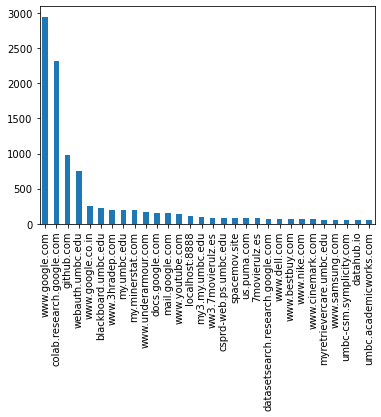

In [54]:
# top 10 sites that I visisted
df['domain'].value_counts()[:30].plot(kind='bar')

In [15]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     1007
1      997
2      529
3       89
4        8
5       16
9       48
10     203
11     395
12     577
13     729
14     598
15     696
16     484
17     503
18     652
19    1310
20    1309
21     706
22     571
23     761
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

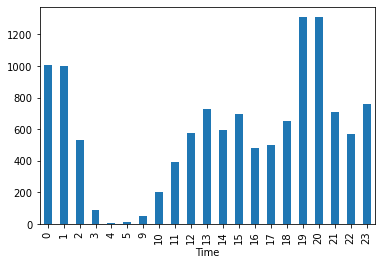

In [16]:
hourly_counts.plot.bar()

In [17]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-02-24 17:50:21,accounts.google.com,Thursday,3
1,2022-02-24 18:08:03,bkkbcggnhapdmkeljlodobbkopceiche,Thursday,3
2,2022-02-24 18:08:05,getadblock.com,Thursday,3
3,2022-02-24 18:08:09,www.grammarly.com,Thursday,3
4,2022-02-24 18:08:12,app.poperblocker.com,Thursday,3


In [18]:
df['Day'].value_counts()

Friday       2921
Saturday     2038
Wednesday    1703
Tuesday      1625
Monday       1621
Thursday     1246
Sunday       1034
Name: Day, dtype: int64

In [19]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1621
1    1625
2    1703
3    1246
4    2921
5    2038
6    1034
Name: DayIndex, dtype: int64

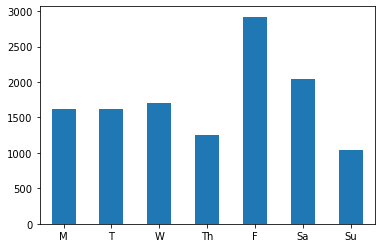

In [20]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [21]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-02-24 17:50:21,accounts.google.com,Thursday,3,False
1,2022-02-24 18:08:03,bkkbcggnhapdmkeljlodobbkopceiche,Thursday,3,False
2,2022-02-24 18:08:05,getadblock.com,Thursday,3,False
3,2022-02-24 18:08:09,www.grammarly.com,Thursday,3,False
4,2022-02-24 18:08:12,app.poperblocker.com,Thursday,3,False


In [22]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [23]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
373,2022-02-26 00:32:40,www.google.co.in,Saturday,5,True
374,2022-02-26 00:32:55,ww2.7movierulz.sh,Saturday,5,True
375,2022-02-26 00:33:00,ww2.7movierulz.sh,Saturday,5,True
376,2022-02-26 00:33:05,ww2.7movierulz.sh,Saturday,5,True
377,2022-02-26 00:33:22,www.google.com,Saturday,5,True


In [24]:
weekday['domain'].value_counts()[:5]

www.google.com               2379
colab.research.google.com    1184
github.com                    783
webauth.umbc.edu              603
www.google.co.in              213
Name: domain, dtype: int64

In [25]:
weekend['domain'].value_counts()[:5]

colab.research.google.com            1136
www.google.com                        564
github.com                            196
webauth.umbc.edu                      146
datasetsearch.research.google.com      77
Name: domain, dtype: int64

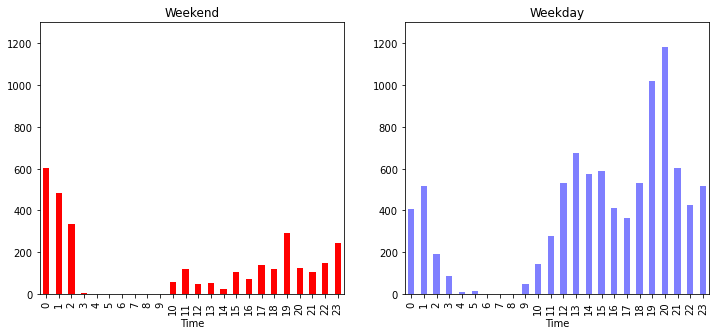

In [26]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


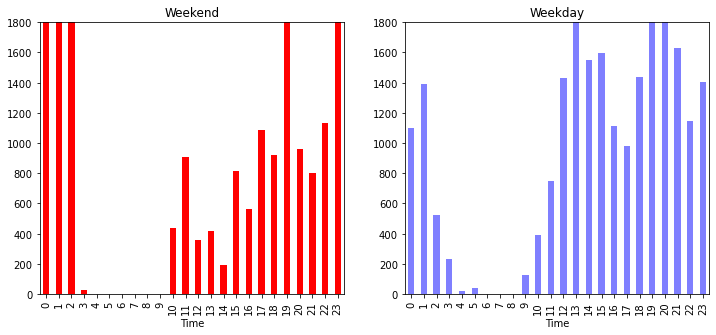

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [28]:
df['domain'].value_counts()[:10]

www.google.com               2943
colab.research.google.com    2320
github.com                    979
webauth.umbc.edu              749
www.google.co.in              249
blackboard.umbc.edu           231
www.3hradep.com               201
my.umbc.edu                   193
my.minerstat.com              192
www.underarmour.com           170
Name: domain, dtype: int64

In [29]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [30]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

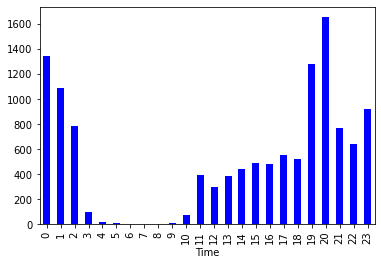

In [31]:
_= show_domain_stats('google', 'blue')

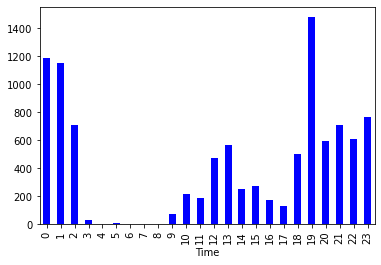

In [32]:
_= show_domain_stats('github|colab|umbc', 'blue')

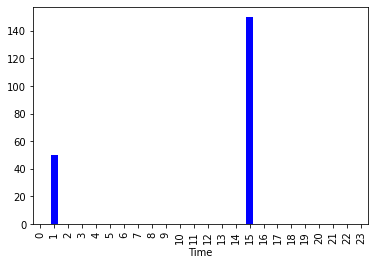

In [36]:
_= show_domain_stats('Netflix', 'blue')

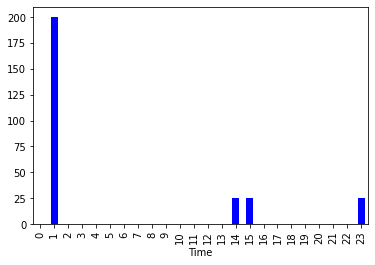

In [37]:
_= show_domain_stats('prime', 'blue')

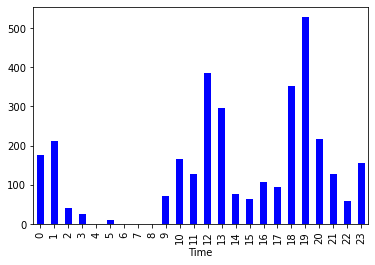

In [38]:
_= show_domain_stats('umbc', 'blue')

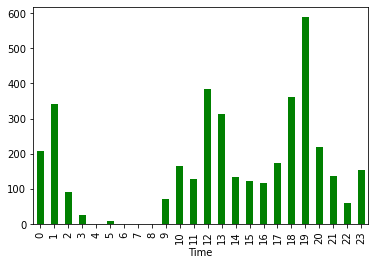

In [39]:
_= show_domain_stats('puma|underarmour|umbc', 'green')

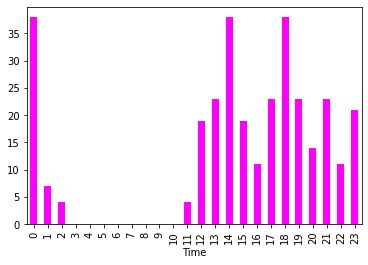

In [40]:
_ = show_domain_stats('youtube', 'magenta')


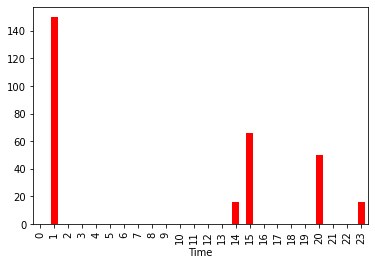

In [41]:
_ = show_domain_stats('netflix|disney|prime', 'red')

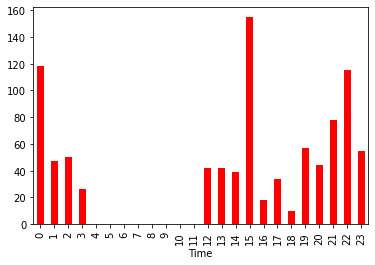

In [49]:
_ = show_domain_stats('fmovies|spacemov|7movierulz', 'red')

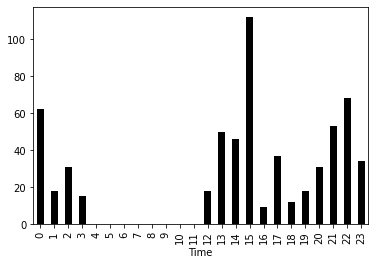

In [51]:
_=show_domain_stats('amazon', 'black')

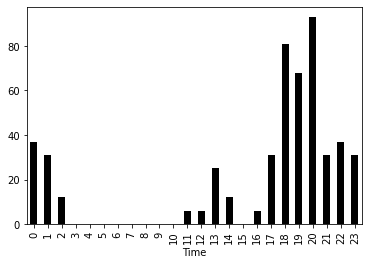

In [46]:
_=show_domain_stats('w3schools|stackoverflow|geeksforgeeks', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

### Answers
1. This is a Personal Computer
2. No He is not employed
3. Mostly on shopping
4. - in weeekdays he sleeps upto 9 am, in Weekends he sleeps upto 10Am ,
   - mostlys likes to shop, 
   - mostly prefers to watch movies in open websites insted of netflix and prime i think he is broke!.
   - mostly prefers to buy items from direct stores.
   - And he is Looking for a electronic gadget like phone(and he mostly visited apple and samsung brands).